# Housing Price Prediction with Linear Regression

Huge thanks to vikrishnan for the Boston House Prices [dataset](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices).

### Importing libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Formatting how DataFrame display numbers and loading the data:

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep="\s+", header=0, names=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
1,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
2,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
3,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
4,0.03,0.00,2.18,0,0.46,6.43,58.70,6.06,3,222.00,18.70,394.12,5.21,28.70


**Dataset Characteristics:**  

        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. MEDV    Median value of owner-occupied homes in $1000's

### Preliminary Data Exploration

Checking for NaN values, duplicates and pulling descriptive statistics

In [4]:
df.shape

(505, 14)

In [5]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [6]:
df.duplicated().any()

False

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00
mean,3.62,11.35,11.15,0.07,0.55,6.28,68.58,3.79,9.57,408.46,18.46,356.59,12.67,22.53
std,8.61,23.34,6.86,0.25,0.12,0.70,28.18,2.11,8.71,168.63,2.16,91.37,7.14,9.21
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.88,45.00,2.10,4.00,279.00,17.40,375.33,7.01,17.00
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.70,3.20,5.00,330.00,19.10,391.43,11.38,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.10,5.21,24.00,666.00,20.20,396.21,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Visualising the Feature distribution

House Prices:

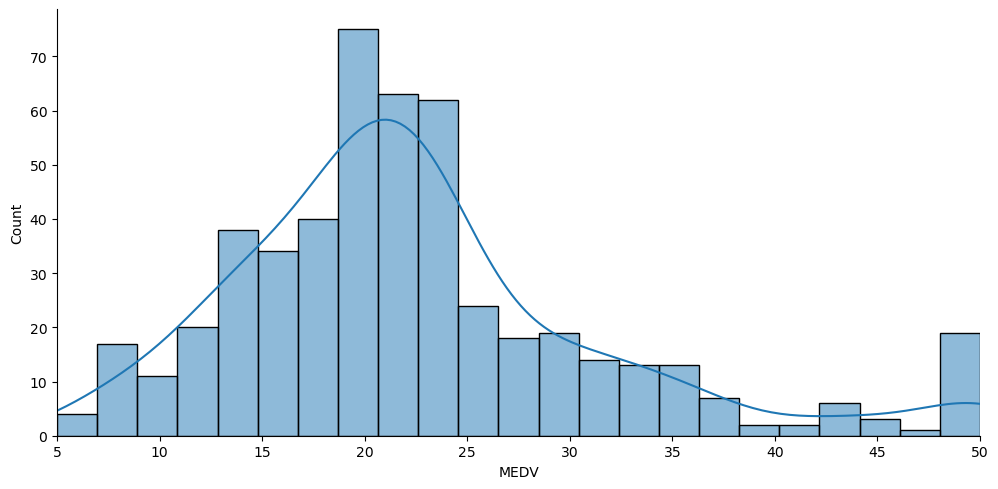

In [8]:
sns.displot(data=df, x="MEDV", kde=True, aspect=2).set(xlim=(df.MEDV.min(), df.MEDV.max()))

Distance to Employment:

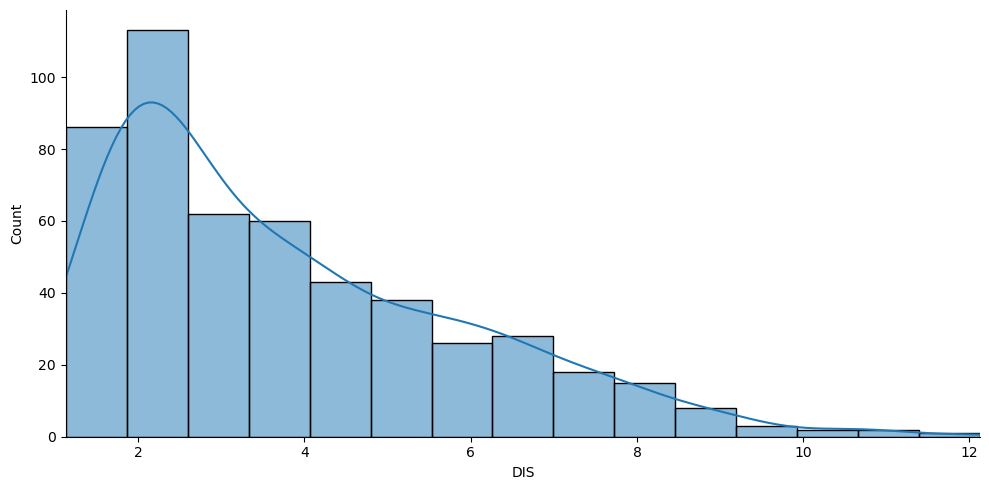

In [9]:
sns.displot(data=df, x="DIS", kde=True, aspect=2).set(xlim=(df.DIS.min(), df.DIS.max()))

Number of Rooms:

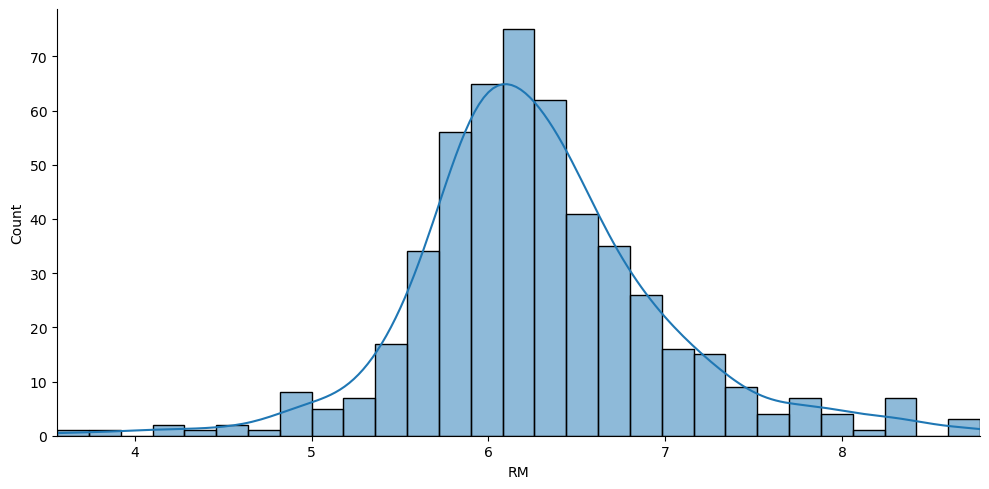

In [10]:
sns.displot(data=df, x="RM", kde=True, aspect=2).set(xlim=(df.RM.min(), df.RM.max()))

Access to Highways:

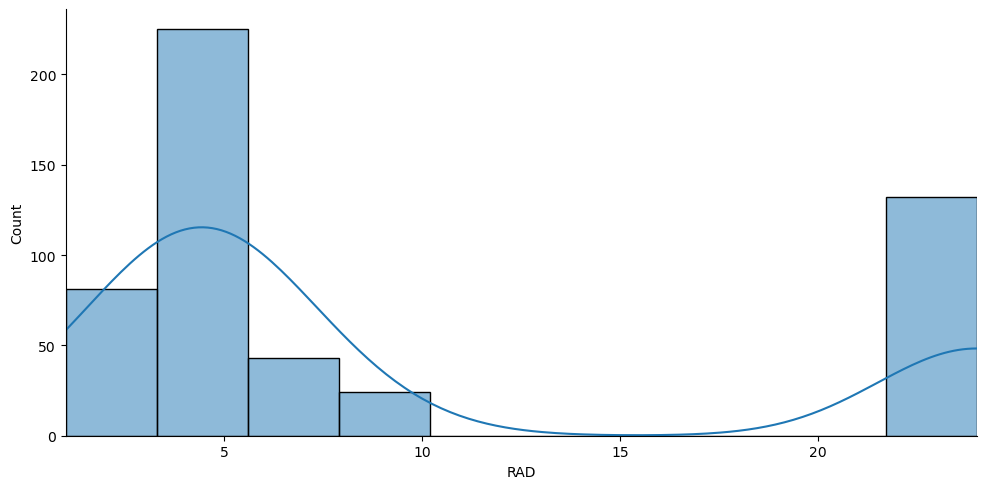

In [11]:
sns.displot(data=df, x="RAD", kde=True, aspect=2).set(xlim=(df.RAD.min(), df.RAD.max()))

Is property next to the River?

In [12]:
CHAS_data = df['CHAS'].value_counts()

fig = px.bar(x=['No', 'Yes'], y=CHAS_data.values, title="Next to Charles River?", labels={'x': 'CHAS', 'y': 'Count'}, color=CHAS_data.values)

fig.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
fig.show()

### Understanding Relationships in the Data

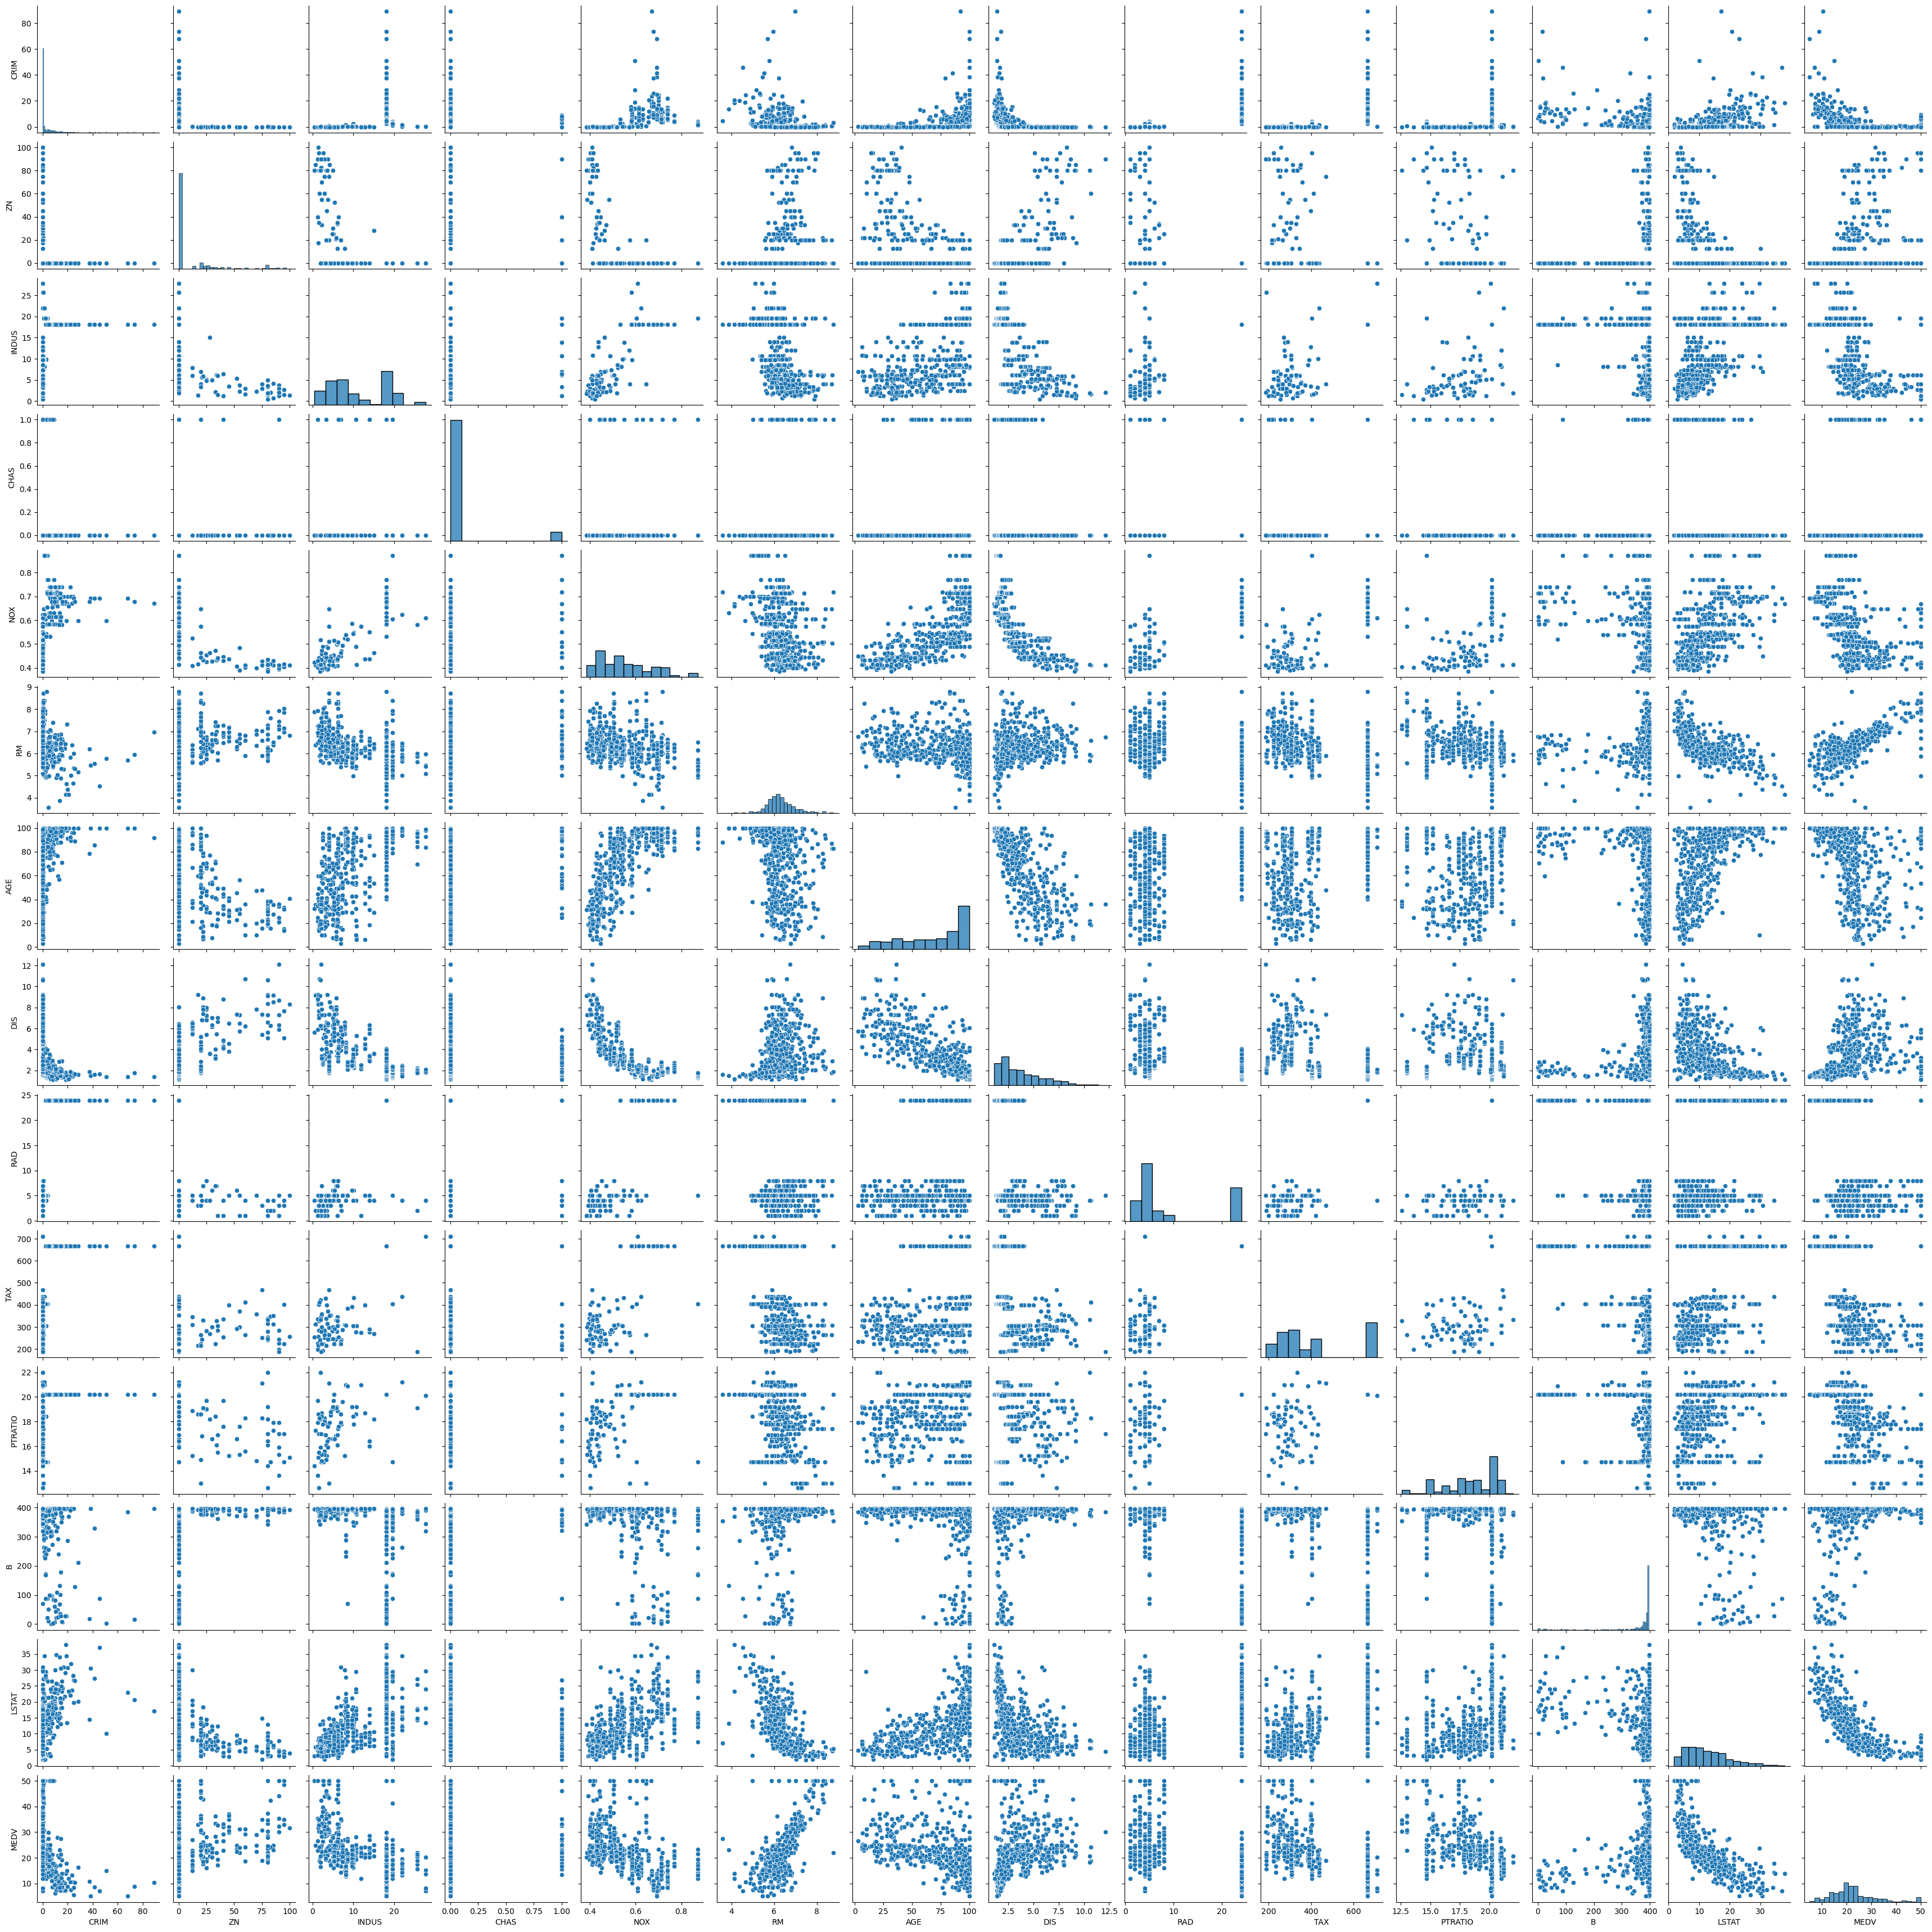

In [13]:
# Running a Pair Plot for all columns:
sns.pairplot(df)

Distance from Employment vs. Pollution:

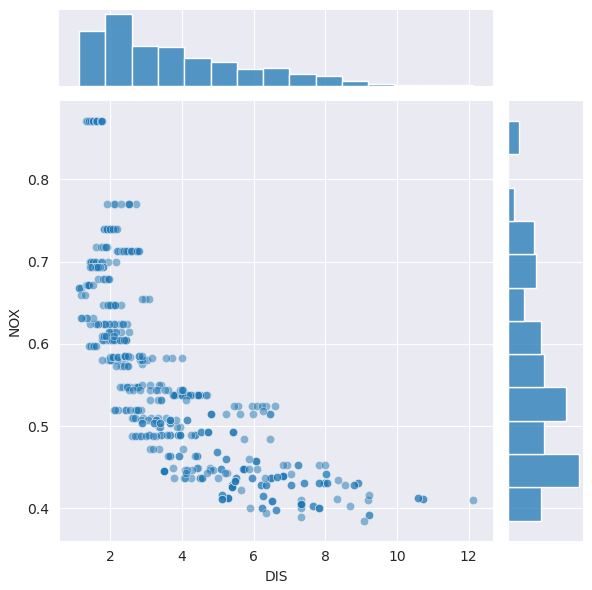

In [14]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df, x="DIS", y="NOX", kind='scatter', joint_kws={'alpha':0.5})

Proportion of Non-Retail Industry vs. Pollution :

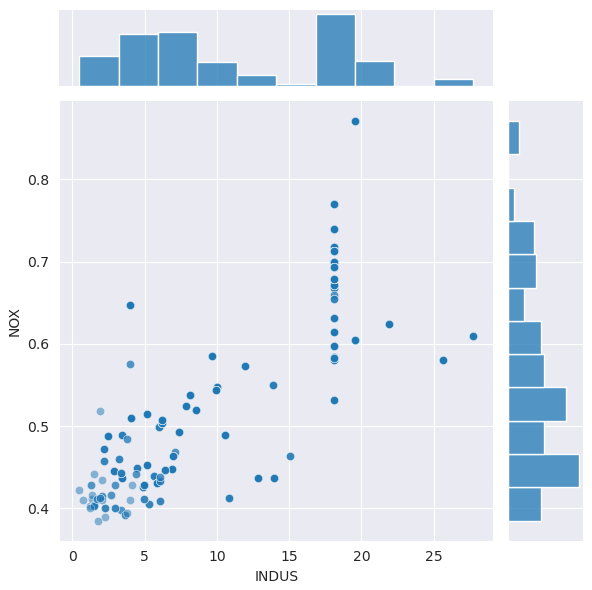

In [15]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df, x="INDUS", y="NOX", kind='scatter', joint_kws={'alpha':0.5})

% of Lower Income Population vs Average Number of Rooms:

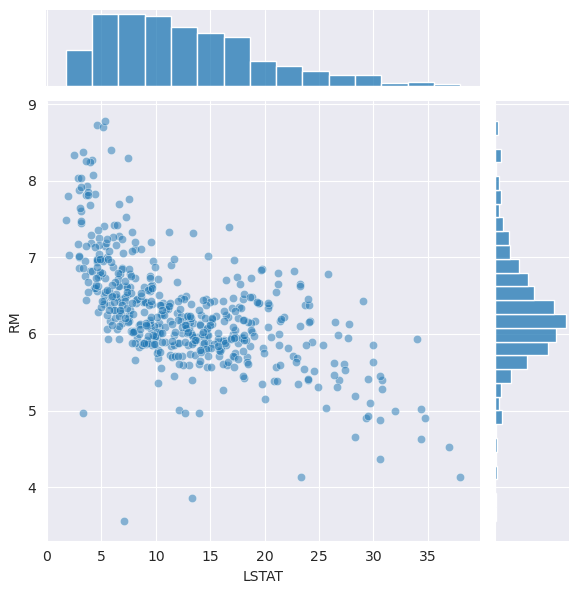

In [16]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df, x="LSTAT", y="RM", kind='scatter', joint_kws={'alpha':0.5})

% of Lower Income Population versus Home Price:

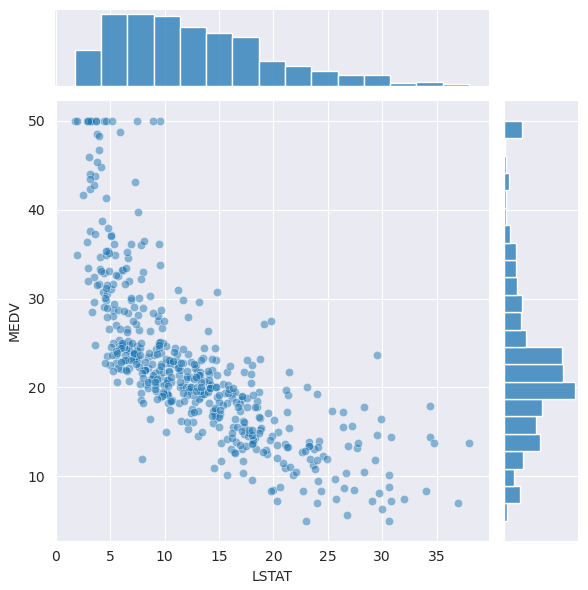

In [17]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df, x="LSTAT", y="MEDV", kind='scatter', joint_kws={'alpha':0.5})

Number of Rooms vs. Home Value:

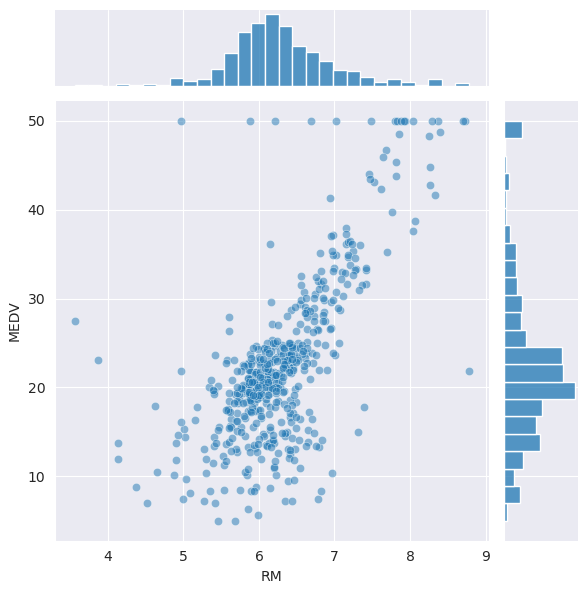

In [18]:
with sns.axes_style('darkgrid'):
    sns.jointplot(data=df, x="RM", y="MEDV", kind='scatter', joint_kws={'alpha':0.5})

Relationships show up exactly as expected:
- Environment gets more and more polluted as we get closer to Retail industry. 
- Real estate prices completely depend on percentage of lower income population in the neighborhood and room number.

### Split Training & Test Dataset

In [19]:
features = df.drop('MEDV', axis=1)
target = df.MEDV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Multivariable Regression Model Creation

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

#### Evaluating the Coefficients of the Model

In [23]:
model_coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['Coefficient'])
model_coef

,Coefficient
CRIM,-0.10
ZN,0.04
INDUS,0.02
CHAS,2.49
NOX,-18.04
RM,4.09
AGE,0.01
DIS,-1.46
RAD,0.30
TAX,-0.01


- Coefficients reflect our correlation assumptions pretty nicely.

R-Squared:

In [24]:
model.score(X_train, y_train)

0.7506902422235837

#### Analysing the Estimated Values & Regression Residuals

In [25]:
prediction = model.predict(X_train)
residuals = y_train - prediction

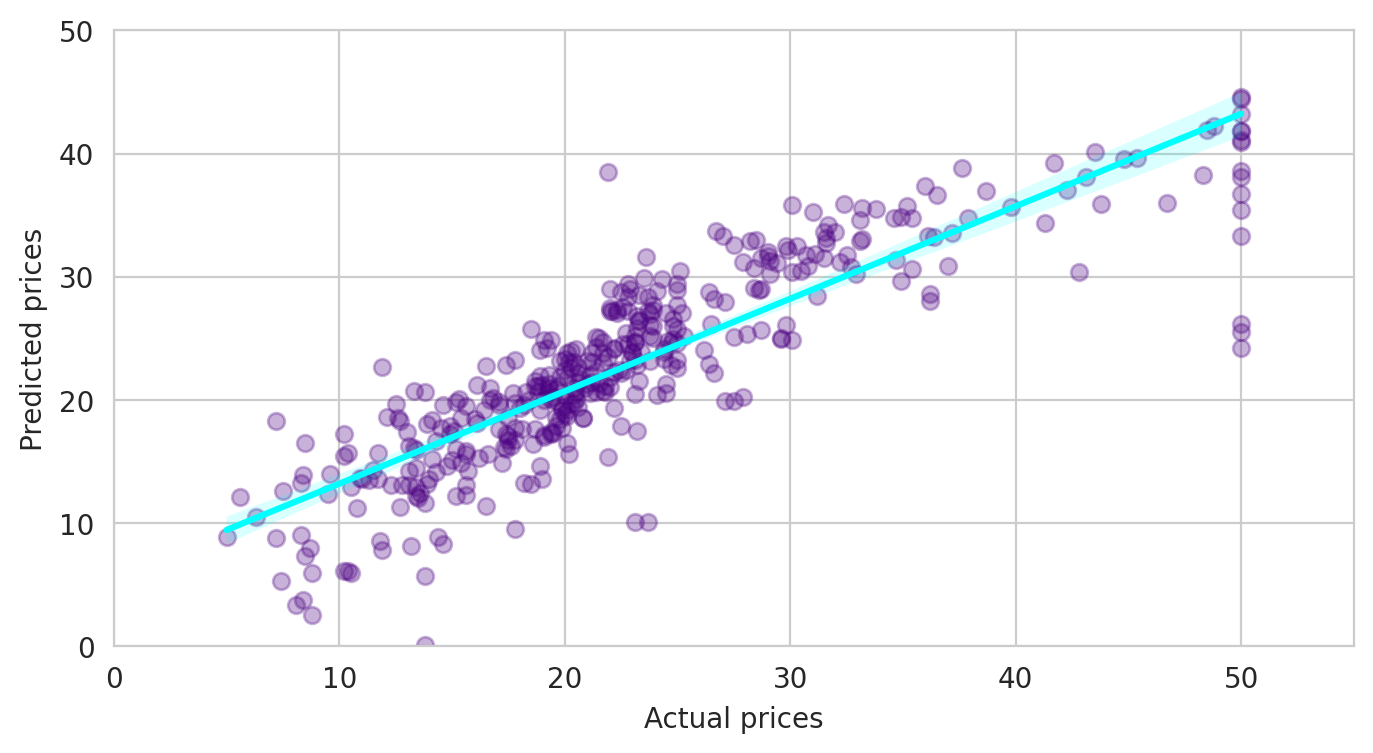

In [26]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    fig = sns.regplot(x=y_train,
                y=prediction,
                scatter_kws = {'alpha': 0.3, 'color': 'indigo'},
                line_kws={'color': 'cyan'})

fig.set_xlim([0, 55])
fig.set_ylim([0, 50])
fig.set(xlabel='Actual prices', ylabel='Predicted prices')
 
plt.show()

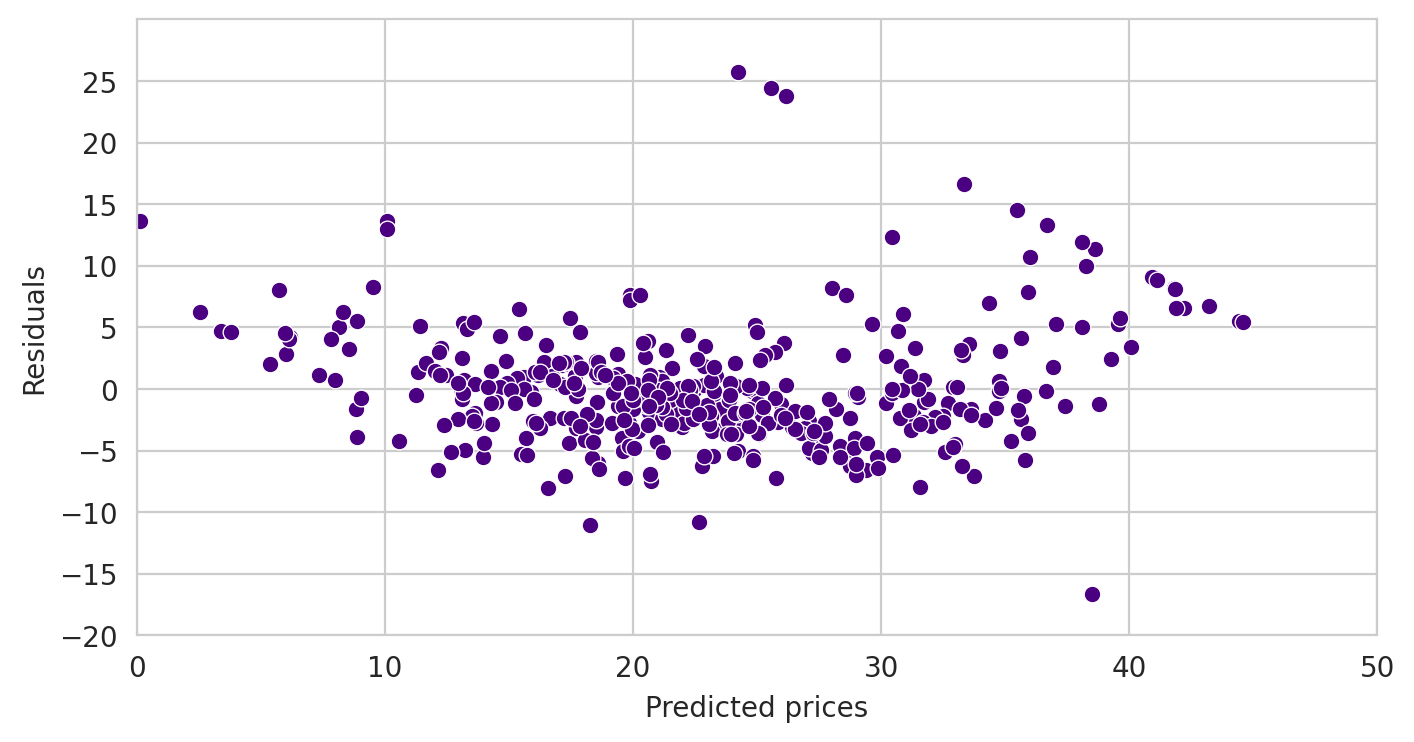

In [27]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    fig = sns.scatterplot(x=prediction,
                y=residuals, color="indigo")

plt.ylim(-20, 30)
plt.xlim(0, 50)
plt.yticks(range(-20, 30, 5))
fig.set(xlabel='Predicted prices', ylabel='Residuals')
 
plt.show()

Calculating Residual Mean and Skewness:

In [28]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)
print(f'Residual mean: {resid_mean}\nResidual skewness: {resid_skew}')

Residual mean: 0.0
Residual skewness: 1.48


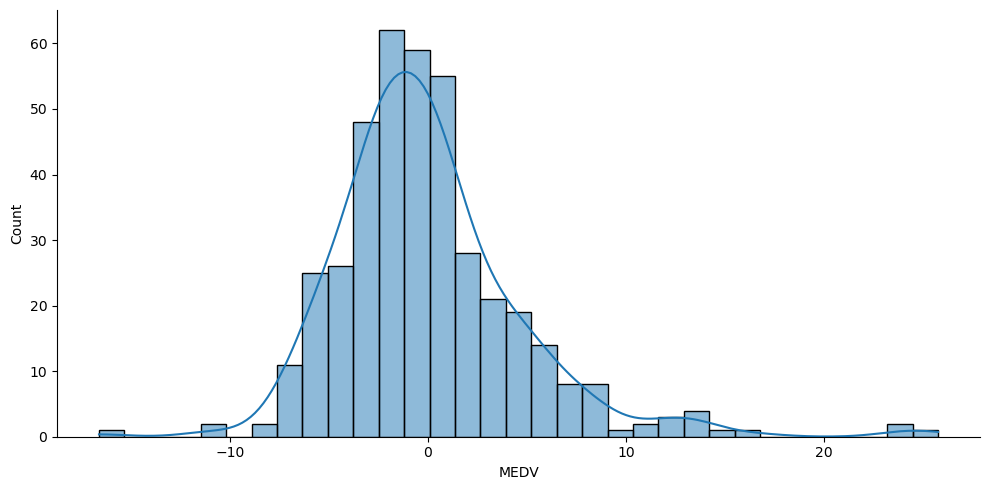

In [29]:
sns.displot(x=residuals, kde=True, aspect=2)

Results are not good. Seems like model caught systematic bias. Skewness is huge.

#### Transforming Data for a Better Fit

Let's review our target variable first:

Text(0.5, 1.0, 'Prices Skew is 1.11')

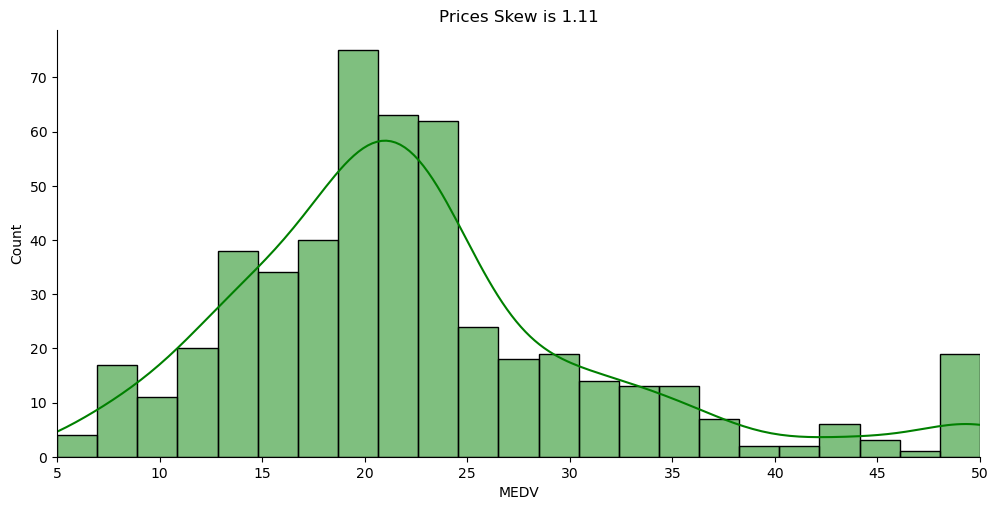

In [30]:
sns.displot(data=df, x="MEDV", kde='kde', aspect=2, color='green').set(xlim=(df.MEDV.min(), df.MEDV.max()))
plt.title(f'Prices Skew is {df.MEDV.skew():.3}')

And we have another skewness problem. Let's Log it:

Text(0.5, 1.0, 'Log Prices Skew is -0.328')

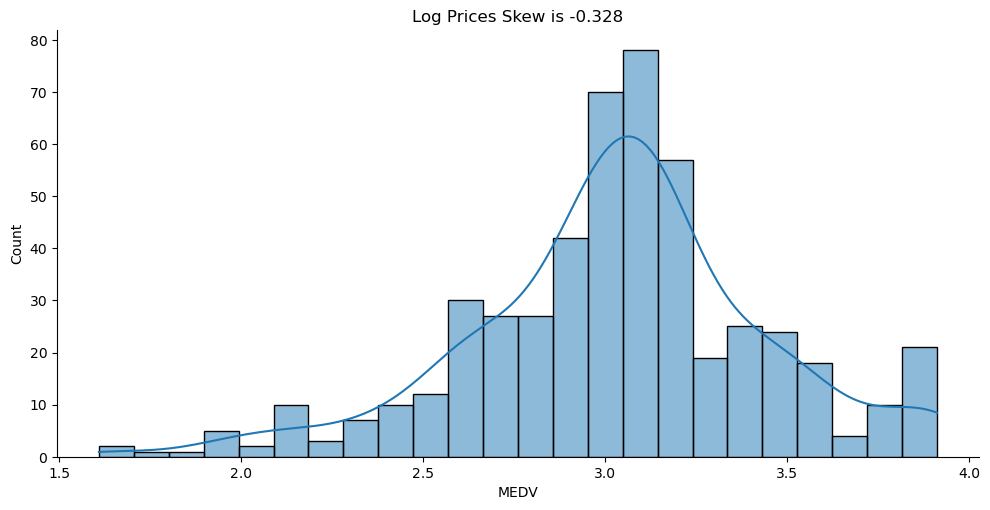

In [31]:
log_price = np.log(df.MEDV) 

sns.displot(x=log_price, aspect=2, kde=True)
plt.title(f'Log Prices Skew is {log_price.skew():.3}')

Pretty good results.

### Regression Model with Log Prices

In [32]:
X_train, X_test, y_train_log, y_test_log = train_test_split(features, log_price, test_size=0.2, random_state=42)

In [33]:
log_model = LinearRegression()

log_model.fit(X_train, y_train_log)

LinearRegression()

In [34]:
log_prediction = log_model.predict(X_train)
log_residuals = y_train_log - log_prediction

#### Evaluating Coefficients with Log Prices

In [35]:
log_model_coef = pd.DataFrame(data=log_model.coef_, index=X_train.columns, columns=['Coefficient'])
log_model_coef

,Coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.09
NOX,-0.76
RM,0.10
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


#### Plotting New Regression Model with Log Prices and Residual Plots

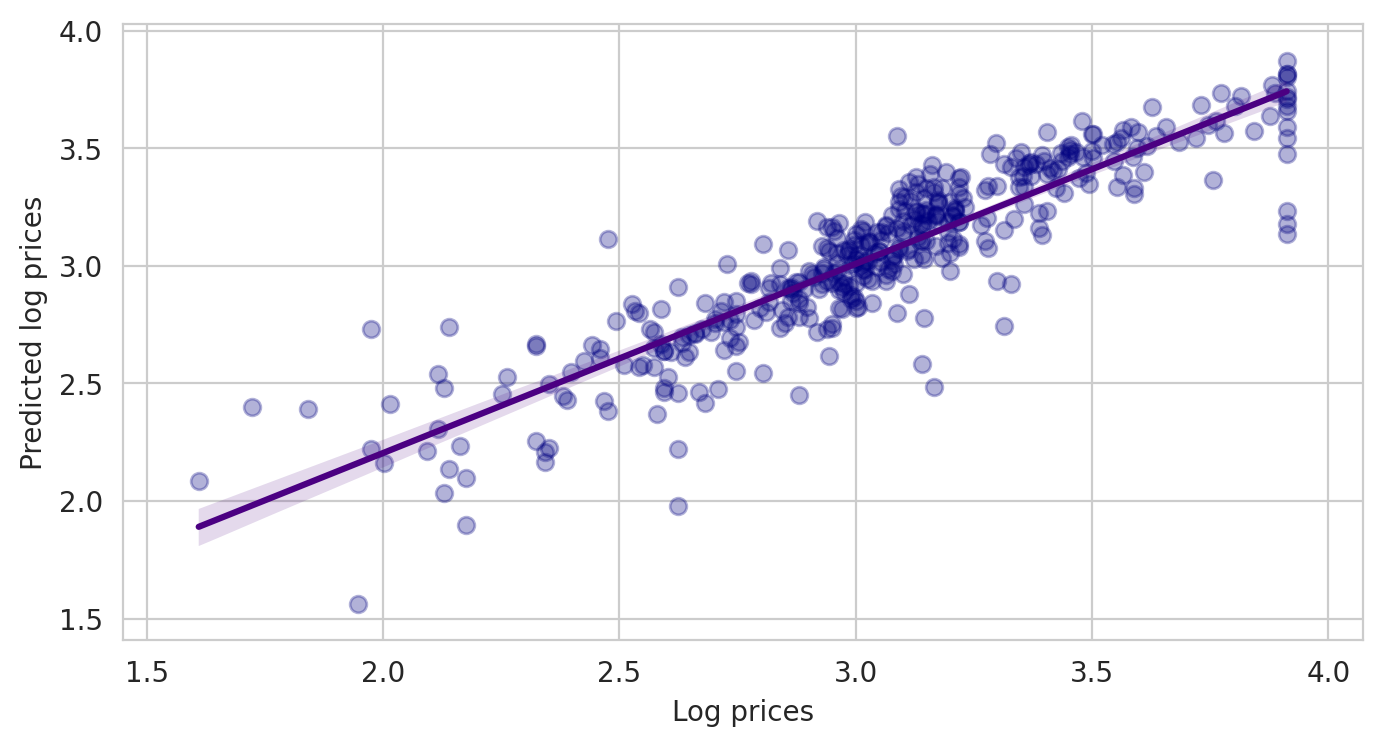

In [36]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    fig = sns.regplot(x=y_train_log,
                y=log_prediction,
                scatter_kws = {'alpha': 0.3, 'color': 'navy'},
                line_kws={'color': 'indigo'})

fig.set_xlim([y_train_log.min()-(y_train_log.min()/10), y_train_log.max()+(y_train_log.min()/10)])
fig.set_ylim([log_prediction.min()-(log_prediction.min()/10), log_prediction.max()+(log_prediction.min()/10)])
fig.set(xlabel='Log prices', ylabel='Predicted log prices')
 
plt.show()

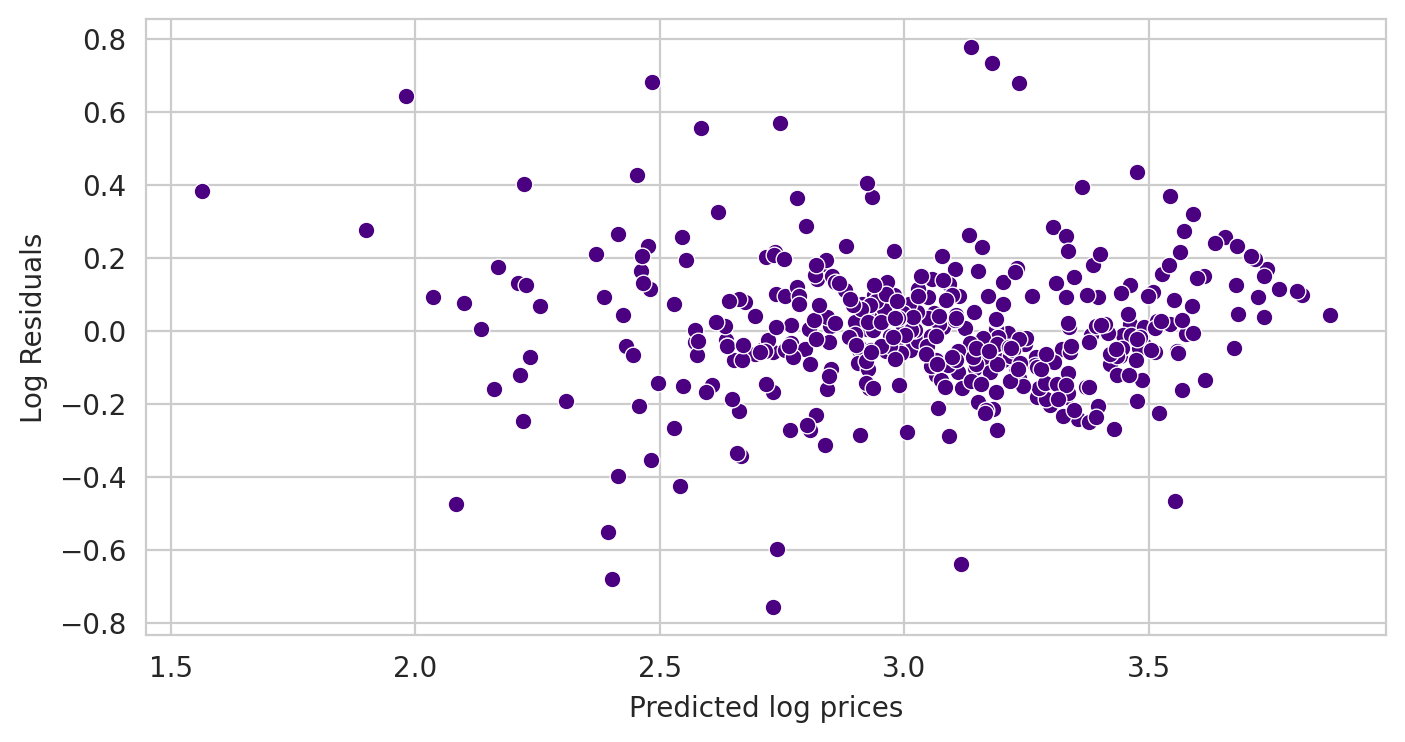

In [37]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    fig = sns.scatterplot(x=log_prediction,
                y=log_residuals, color="indigo")


fig.set(xlabel='Predicted log prices', ylabel='Log Residuals')
 
plt.show()

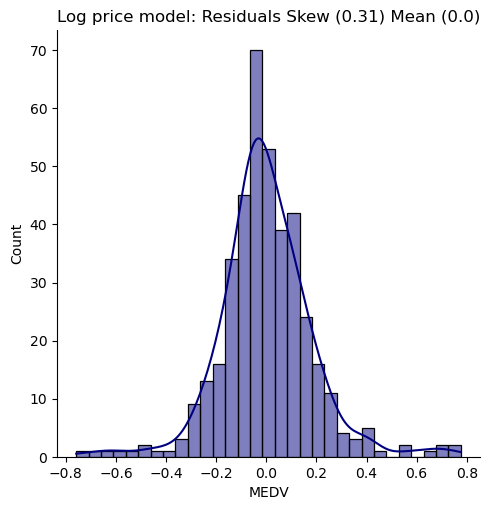

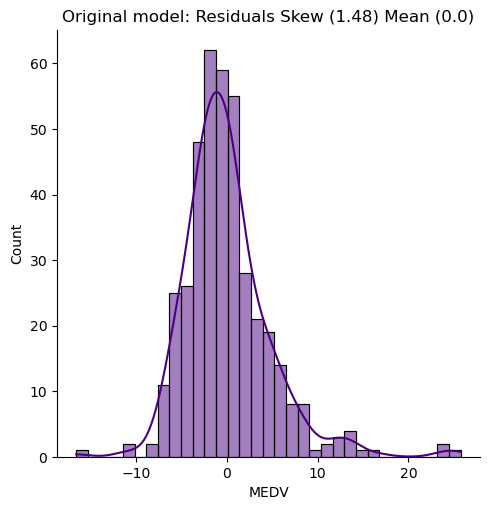

In [38]:
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Original model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

Results are definitely more promising.

#### Compare Out of Sample Performance

In [39]:
model.score(X_test, y_test)

0.6522201888666233

In [40]:
log_model.score(X_test, y_test_log)

0.6942463769718965

- R-Squared values show a pretty big improvement for the model accuracy.

### Predicting a Property's Value using the Regression Coefficients

The average property has the mean value for all its charactistics:

In [41]:
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.62,11.35,11.15,0.07,0.55,6.28,68.58,3.79,9.57,408.46,18.46,356.59,12.67


In [42]:
log_avg_price = log_model.predict(property_stats)

avg_price = np.exp(log_avg_price) * 1000
print(f'Price of the average property: {round(avg_price[0], 2)}')

Price of the average property: 20879.59


#### Predicting Price for made up feature characteristics

In [43]:
property_stats['CRIM'] = 0.5
property_stats['ZN'] = 10
property_stats['INDUS'] = 5
property_stats['CHAS'] = 1
property_stats['NOX'] = 0.1
property_stats['RM'] = 8
property_stats['AGE'] = 5
property_stats['DIS'] = 10
property_stats['RAD'] = 10
property_stats['TAX'] = 200
property_stats['PTRATIO'] = 10
property_stats['B'] = 150
property_stats['LSTAT'] = 2


In [44]:
log_prop_price = log_model.predict(property_stats)

prop_price = np.exp(log_prop_price) * 1000
print(f'Predicted Price of the property: {round(prop_price[0], 2)}')

Predicted Price of the property: 53587.77


All in all, model seems to be working without any issues. I had a blast on this analysis. Please do a pull request if you see places for improvement, or just message me and we'll work something out.